# Image Reconstruction using Auto-Encoders

An autoencoder is, by definition, a technique to encode something automatically. By using a neural network, the autoencoder is able to learn how to decompose data (in our case, images) into fairly small bits of data, and then using that representation, reconstruct the original data as closely as it can to the original.

## Importing libraries and loading data

In [1]:
# Import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, LeakyReLU as LR, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt

from IPython import display
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

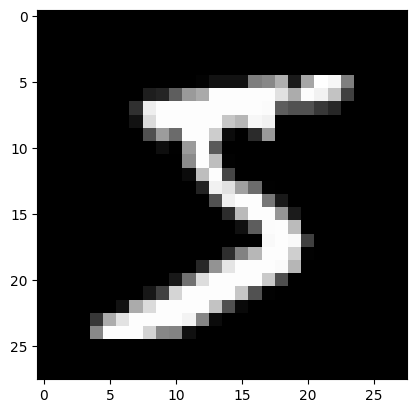

In [2]:
# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.imshow(x_train[0], cmap = 'gray')
plt.show()

## Build an Auto-Encoder model

In [3]:
# Encoder and Decoder Model
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)), Dense(512), LR(), Dropout(0.5), Dense(256), LR(), Dropout(0.5), Dense(128), LR(), 
    Dropout(0.5), Dense(64), LR(), Dropout(0.5), Dense(LATENT_SIZE, activation = 'sigmoid')
])

decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)), LR(), Dropout(0.5), Dense(128), LR(), Dropout(0.5), 
    Dense(256), LR(), Dropout(0.5), Dense(512), LR(), Dropout(0.5), Dense(784), Activation('sigmoid'), Reshape((28, 28))
])

In [4]:
# Compile the model
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile('nadam', loss = 'binary_crossentropy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


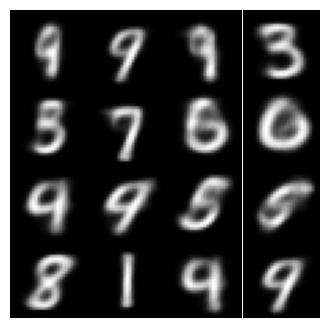

----------- EPOCH 10 -----------
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.1925


In [5]:
EPOCHS = 10

for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize = (4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

    # If you imported display from IPython
    display.clear_output() 
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = 'gray')
            axs[i, j].axis('off')
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print('-----------', 'EPOCH', epoch + 1, '-----------')
    model.fit(x_train, x_train, batch_size = 64)